## Central Limit Theorem

The [central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) is a key result in probability theory that helps explain why normal, or Gaussian, distributions are so omnipresent. The setup is that you have distributions for $N$ random variables $x_i$ and you want to know the distribution of $q = \sum_{i=1}^{N} x_i$. Think of each $x_i$ as coming from it's own distribution like in the figure below. For instance, $x_1$ might be the weight of spoons, $x_2$ the weight of forks, $x_3$ the weight of bowls, ..., and $x_N$ of plates in your kitchen. Then $q$ would represent the total weight when you have one of each of those objects. The distribution of weights for each object might be weird because you have some mix-and-match set of silverware from your parents, grandparents, IKEA, and the thrift shop. The *central limit theorem* says that if you have enough objects (i.e. $N$ is large), then $q$ has a normal (Gaussian) distribution.

![](Central_limit_theorem.png)

Moreover, the central limit theorem states that the mean value of $q$ is given by

\begin{equation}
\mu_{q} = \sum_{i=1}^{N} \mu_{x_i} 
\end{equation}

and the variance (standard deviation squared) is given by

\begin{equation}
\sigma_{q}^{2} = \sum_{i=1}^{N} \sigma^2_{x_i} 
\end{equation}

*if you are having problems with the math displaing, click [here](http://nbviewer.jupyter.org/github/cranmer/intro-exp-phys-II/blob/master/Central-Limit-Theorem.ipynb?flush_cache=true)*

The mean probably isn't surprising because $q$ is just a sum and the integral the defines the mean just distributes across each term. Also, the equation for the variance is the same as the propagation of errors formula we use when we add different measurements together. However, that propoagation of errors formula is derived from the Central Limit Theorem, not vice versa.

### This is a collaborative project

In this repository there is a folder called `distributions` with several python files. The idea is that each student will create one of these python files and we will use GitHub to collect them. Each of these files has a python class that describes a probability distribution.  Each of these classes will define:
   * `x_min, x_max, f_max` - used for the accept/reject Monte Carlo sampling algorithm
   * `pdf()` - the probability density function
   * `mean()` - the mean of the pdf
   * `std()` - the standard deviation of the pdf
   
In addition, each of these python classes inherits from `BaseDistribution` which knows how to run the accept/reject algorithm using the information above ([see inside](distributions/base_distribution.py) ). In order to generate `n_samples` from the pdf, you simply call `dist.rvs(n_samples)`, where `dist` is an instance of one of these python classes.

**Naming Convention**: Name your file `Dist_<netid>.py` and your distribution the same way (without the `.py`). If you want to contribute more than one distribution, you can can add `Dist_<netid>_<index>.py`, where `<index>` is 1,2,3,...

Here's an example:

In [1]:
!cat distributions/Dist_kc90.py

import numpy as np
from .base_distribution import BaseDistribution

class Dist_kc90(BaseDistribution):
	def __init__(self):
		self.f_max = 1
		self.x_min = -1
		self.x_max = 1


	def pdf(self, x):
		"""This is your PDF"""
		return np.abs(x)

	def mean(self):
		"""This is the mean of the PDF"""
		return 0.

	def std(self):
		"""This is the standard deviation of the pdf"""
		return np.sqrt(0.5)




## Example usage of the distributions

Ok, now let's use them. So far there are only two distributions, but there will be more soon.

In [2]:
%pylab inline --no-import-all
from scipy.stats import norm #will use this for plotting

Populating the interactive namespace from numpy and matplotlib


In [3]:
# import all our distributions
import distributions

In [4]:
# some funny python to make a list of all the distributions for convenience
all_distributions_dict = dict([(name, cls) for name, cls in distributions.__dict__.items() if isinstance(cls, type)])
all_distributions_list = [(cls) for name, cls in distributions.__dict__.items() if isinstance(cls, type)]
# print out their names
all_distributions_dict.keys()

dict_keys(['Dist_cmr653', 'Dist_rdm445', 'Dist_lwp226', 'Dist_fay221', 'Dist_speedreed', 'Dist_ltw244', 'Dist_pme240', 'Dist_bt1369', 'Dist_kc90', 'Dist_rmr557', 'Dist_jam1535', 'Dist_mm7253', 'Dist_at4227', 'Dist_os852', 'Dist_ia1113', 'Dist_knd286', 'Dist_yz4244', 'Dist_aew492', 'Dist_cah736', 'Dist_pr1392', 'Dist_cas955', 'Dist_phh250', 'Dist_ks938', 'Dist_sk7372', 'Dist_ap5312', 'Dist_sj2879', 'Dist_dmc731', 'Dist_sdl433', 'Dist_pbg240', 'Dist_pw1091', 'Dist_lac683', 'Dist_ajt540', 'Dist_sm6779', 'Dist_omr234', 'Dist_npl248', 'Dist_speedreed2', 'Dist_jnt299', 'Dist_emm815', 'Dist_abw400', 'Dist_sea438', 'Dist_sb6187', 'Dist_fh828', 'Dist_ejt352', 'Dist_tt1392', 'Dist_jdg577'])

In [5]:
len(all_distributions_dict.keys())

45

In [6]:
## Do tests
ok_distributions_list=[]
problems=[]
for i, cls in enumerate(all_distributions_list):
    #print(cls)
    try:
        dist = cls()
        N_test = 100000
        #print('will try to generate for %s' %(cls.__name__))
        if dist.pdf(dist.x_min + .3*(dist.x_max-dist.x_min)) < 1E-3:
            print("may have a problem")
            continue
            
        rvs = dist.rvs(N_test)
        if np.abs(np.mean(rvs) - dist.mean()) > 5*np.std(rvs)/np.sqrt(N_test):
            print("means don't match for %s: %f vs. %f" %(cls.__name__, 
                                                          np.mean(rvs), dist.mean()))
            continue
            
        elif np.abs(np.std(rvs) - dist.std()) > 5*np.std(rvs)/np.sqrt(np.sqrt(1.*N_test)):
            print("std devs. don't match for %s: %f vs. %f" %(cls.__name__, 
                                                          np.std(rvs), dist.std()))
            continue
        elif np.abs(np.std(rvs) - dist.std()) / dist.std() > 0.1:
            print("std devs. don't match for %s: %f vs. %f" %(cls.__name__, 
                                                          np.std(rvs), dist.std()))
            continue
        
        elif np.sum(dist.pdf(np.linspace(dist.x_min,dist.x_max,100))<0) > 0:
            print("pdf was negative in some places")
            continue                    

        else:
            print("%s passes tests, adding it" %(cls.__name__))
            ok_distributions_list.append(cls)
    except:
        print("%s has errors, does't work" %(cls.__name__))
        continue

print("list of ok distributions:",[i.__name__ for i in ok_distributions_list])




Dist_cmr653 passes tests, adding it
Dist_rdm445 passes tests, adding it
means don't match for Dist_lwp226: 0.333034 vs. 2.500000
means don't match for Dist_fay221: 0.499642 vs. 1.500000
Dist_speedreed passes tests, adding it
Dist_ltw244 passes tests, adding it
std devs. don't match for Dist_pme240: 0.095164 vs. 0.040377
Dist_bt1369 passes tests, adding it
Dist_kc90 passes tests, adding it
Dist_rmr557 passes tests, adding it
Dist_jam1535 has errors, does't work
means don't match for Dist_mm7253: 0.098577 vs. 0.119000
means don't match for Dist_at4227: 1.871766 vs. 1.500000
Dist_os852 passes tests, adding it
Dist_ia1113 passes tests, adding it
Dist_knd286 passes tests, adding it
means don't match for Dist_yz4244: 0.834433 vs. 0.166667
Dist_aew492 passes tests, adding it


/Users/cranmer/Documents/GitHub/intro-exp-phys-II/distributions/Dist_cah736.py:13: RuntimeWarning: invalid value encountered in true_divide
  return ((np.sin(x)**2))/(1.55595*x)
/Users/cranmer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in less


Dist_cah736 passes tests, adding it
means don't match for Dist_pr1392: 0.733684 vs. 0.000000
means don't match for Dist_cas955: 0.621598 vs. 0.000000
Dist_phh250 passes tests, adding it
Dist_ks938 has errors, does't work
Dist_sk7372 passes tests, adding it
means don't match for Dist_ap5312: 0.722339 vs. 0.800000
Dist_sj2879 passes tests, adding it
Dist_dmc731 passes tests, adding it
Dist_sdl433 passes tests, adding it
means don't match for Dist_pbg240: 2.403413 vs. 3.200000
Dist_pw1091 passes tests, adding it
Dist_lac683 passes tests, adding it
Dist_ajt540 passes tests, adding it
Dist_sm6779 passes tests, adding it
means don't match for Dist_omr234: 0.666733 vs. 1.000000
Dist_npl248 passes tests, adding it
Dist_speedreed2 passes tests, adding it
std devs. don't match for Dist_jnt299: 0.040549 vs. 0.001646
Dist_emm815 passes tests, adding it
means don't match for Dist_abw400: 0.564249 vs. 0.600000
Dist_sea438 passes tests, adding it
Dist_sb6187 passes tests, adding it
std devs. don't ma

In [7]:
problems = [x for x in all_distributions_list if x not in ok_distributions_list]
[i.__name__ for i in problems]

['Dist_lwp226',
 'Dist_fay221',
 'Dist_pme240',
 'Dist_jam1535',
 'Dist_mm7253',
 'Dist_at4227',
 'Dist_yz4244',
 'Dist_pr1392',
 'Dist_cas955',
 'Dist_ks938',
 'Dist_ap5312',
 'Dist_pbg240',
 'Dist_omr234',
 'Dist_jnt299',
 'Dist_abw400',
 'Dist_fh828']

In [8]:
# how many samples for plots?
n_samples = 100000

/Users/cranmer/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


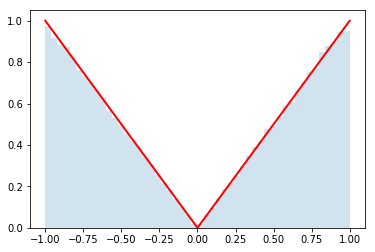

In [9]:
# Here's an example of usage
dist = distributions.Dist_kc90()
rvs = dist.rvs(n_samples)
counts, bins, edges = plt.hist(rvs, bins=50, normed=True, alpha =0.2)
y = []
for bin in bins:
    y.append(dist.pdf(bin))
plt.plot(bins, y, c='r', lw=2)

In [10]:
dist.std()

0.7071067811865476

## Let's inspect all the distributions we have

Here we will loop over the different distributions and make a plot like the one above

Dist_cmr653: std from samples = 1.25, std from dist = 1.25
Dist_rdm445: std from samples = 0.71, std from dist = 0.71
Dist_speedreed: std from samples = 1.41, std from dist = 1.41
Dist_ltw244: std from samples = 0.58, std from dist = 0.58
Dist_bt1369: std from samples = 1.57, std from dist = 1.57
Dist_kc90: std from samples = 0.71, std from dist = 0.71
Dist_rmr557: std from samples = 0.61, std from dist = 0.61
Dist_os852: std from samples = 0.65, std from dist = 0.65
Dist_ia1113: std from samples = 0.14, std from dist = 0.14
Dist_knd286: std from samples = 0.31, std from dist = 0.31
Dist_aew492: std from samples = 0.39, std from dist = 0.39
Dist_cah736: std from samples = 1.50, std from dist = 1.50
Dist_phh250: std from samples = 0.24, std from dist = 0.24
Dist_sk7372: std from samples = 0.71, std from dist = 0.71
Dist_sj2879: std from samples = 2.33, std from dist = 2.32
Dist_dmc731: std from samples = 0.69, std from dist = 0.70
Dist_sdl433: std from samples = 0.39, std from dist = 0.

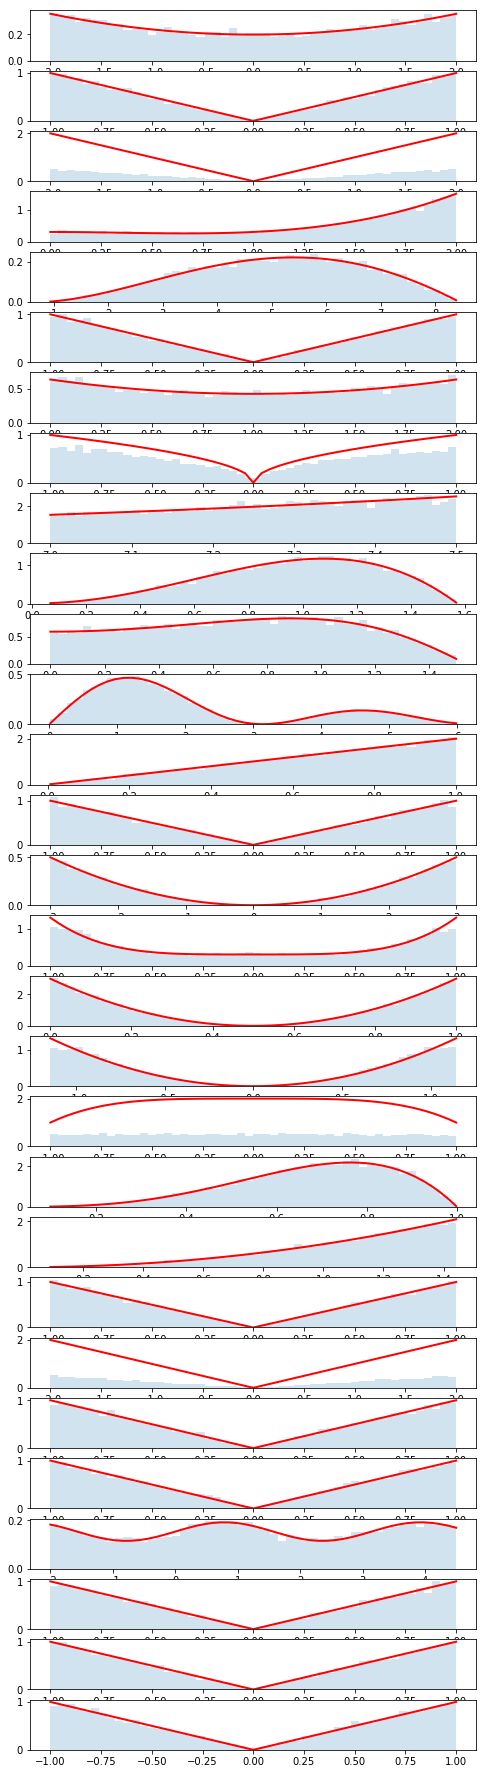

In [11]:
fig = plt.figure(figsize=2*plt.figaspect(len(ok_distributions_list)))
for i, cls in enumerate(ok_distributions_list):
    dist = cls()
    rvs = dist.rvs(10000)
    ax = fig.add_subplot(len(ok_distributions_list),1,i+1)
    counts, bins, patches = ax.hist(rvs, bins=50, normed=True, alpha=0.2)
    # depending on how you code up your pdf() function, numpy might not
    # be able to "broadcast" (apply the function for each element of a numpy array)
    # but this should always wrok
    y = []
    for bin in bins:
        y.append(dist.pdf(bin))
        
    # ok, now plot it
    plt.plot(bins, y, c='r', lw=2)
    
    # and let's check if the distribution is ok
    print("%s: std from samples = %.2f, std from dist = %.2f" %(cls.__name__,np.std(dist.rvs(n_samples)), dist.std()))
    if np.abs(np.std(dist.rvs(n_samples)) - dist.std()) / dist.std() > 0.1:
        print("looks like a problem with this distribution: ", cls)

## Demonstration of the Central Limit Theorem

ok, let's use one of the distributions to demonstrate the central limit theorem. We will use the same distribution $N$ times.

First let's make a little helper function.

In [12]:
def do_convolution(dist, N):
    n_samples = 10000
    q = np.zeros(n_samples)
    var_q = 0.
    mean_q = 0.

    for i in range(N):
        q = q+dist.rvs(n_samples)
        var_q = var_q + dist.std()**2
        mean_q = mean_q + dist.mean()

    std_q = np.sqrt( var_q )


    counts, bins, patches = plt.hist(q,bins=50, normed=True, alpha=.2)
    plt.plot(bins, norm.pdf(bins,loc=mean_q, scale=std_q), lw=2, c='r')

Now let's use it for $N=\{2,4,32\}$

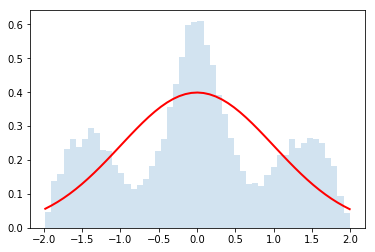

In [13]:
dist = distributions.Dist_kc90()
do_convolution(dist,2)

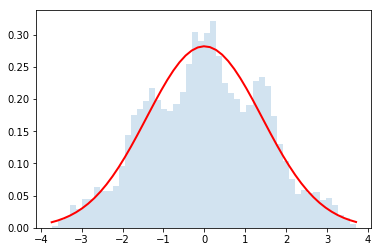

In [14]:
do_convolution(dist,4)

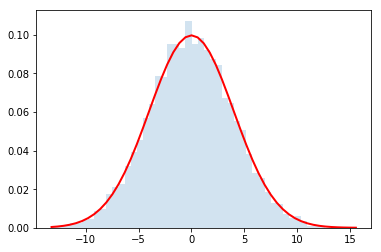

In [15]:
do_convolution(dist,32)

*Gorgeous!*

## Now let's do the same thing randomly using different distributions 

To do this we will use `np.random.choice` to randomly choose from our list. Here's an example

In [16]:
np.random.choice(['a','b','c','d'], 10)

array(['c', 'a', 'd', 'c', 'd', 'b', 'c', 'c', 'b', 'd'], dtype='<U1')

Now let's make a variation on the helper function above

In [17]:
def do_random_convolution(list_of_distributions, N):
    n_samples = 10000
    q = np.zeros(n_samples)
    var_q = 0.
    mean_q = 0.

    for dist_class in np.random.choice(list_of_distributions,N):
        dist = dist_class()
        print(dist_class.__name__, dist.std())
        q = q+dist.rvs(n_samples)
        var_q = var_q + dist.std()**2
        mean_q = mean_q + dist.mean()

    std_q = np.sqrt( var_q )


    counts, bins, patches = plt.hist(q,bins=50, normed=True, alpha=.2)
    plt.plot(bins, norm.pdf(bins,loc=mean_q, scale=std_q), lw=2, c='r')

Dist_pw1091 0.88669
Dist_os852 0.6545248448388085


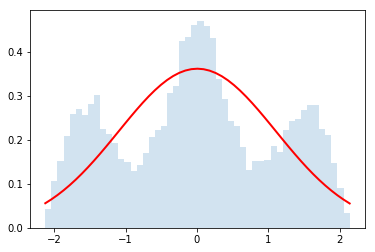

In [18]:
do_random_convolution(ok_distributions_list,2)

Dist_speedreed2 1.4142135623730951
Dist_speedreed2 1.4142135623730951
Dist_knd286 0.3070547093925828
Dist_dmc731 0.696932


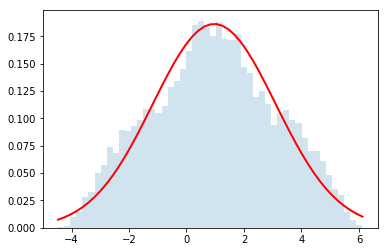

In [19]:
do_random_convolution(ok_distributions_list,4)

Dist_cah736 1.5022283448264449
Dist_sb6187 1.902
Dist_knd286 0.3070547093925828
Dist_sb6187 1.902


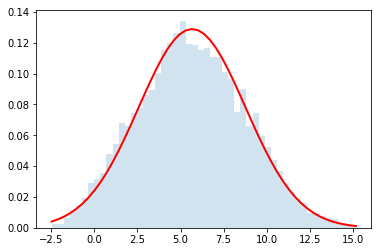

In [20]:
do_random_convolution(ok_distributions_list,4)

Dist_sb6187 1.902
Dist_sj2879 2.32379000772445
Dist_tt1392 0.7071067811865476
Dist_ajt540 0.17339222485840364
Dist_jdg577 0.7071067811865476
Dist_ltw244 0.581033561853
Dist_sm6779 0.27929
Dist_ejt352 0.7071067811865476
Dist_sb6187 1.902
Dist_phh250 0.23570226039551584
Dist_npl248 0.7071067811865476
Dist_ajt540 0.17339222485840364
Dist_rdm445 0.7071067811865476
Dist_speedreed 1.4142135623730951
Dist_cah736 1.5022283448264449
Dist_rmr557 0.609449400220044
Dist_rdm445 0.7071067811865476
Dist_cmr653 1.248156535392138
Dist_ltw244 0.581033561853
Dist_speedreed2 1.4142135623730951
Dist_cah736 1.5022283448264449
Dist_speedreed 1.4142135623730951
Dist_rdm445 0.7071067811865476
Dist_rmr557 0.609449400220044
Dist_rdm445 0.7071067811865476
Dist_ltw244 0.581033561853
Dist_lac683 0.5394490624751247
Dist_jdg577 0.7071067811865476
Dist_npl248 0.7071067811865476
Dist_rmr557 0.609449400220044
Dist_phh250 0.23570226039551584
Dist_bt1369 1.56953460038


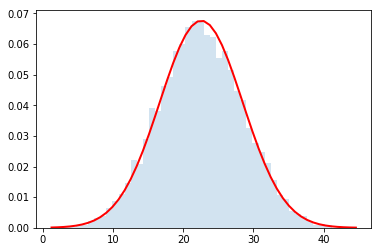

In [21]:
do_random_convolution(ok_distributions_list,32)

# Part 2 of project

## a) preliminaries
From either master or the branch you used to submit your distribution, update so that you have the current version of `cranmer/intro-exp-phys-II`.

You can either do this in GitHub desktop by finding the button near the top left or by typing this:
```
git fetch cranmer master
git merge cranmer/master
```

Now Create a new branch called "part2"


## b) execute the notebook above

## c) Make a $\chi^2$ function

Below is a copy of the `do_random_convolution` function with a new name. Modify it so taht it returns the chi-square quantity that says how closely the observed distribution matches the prediction from the Central Limit theorem.

YOu might want to check out the [chi-square-of-distribution](chi-square-of-distribution.ipynb) notebook

In [22]:
def do_random_convolution_with_chi2(list_of_distributions, N):
    n_samples = 100000
    q = np.zeros(n_samples)
    var_q = 0.
    mean_q = 0.

    for dist_class in np.random.choice(list_of_distributions,N):
        dist = dist_class()
        q = q+dist.rvs(n_samples)
        var_q = var_q + dist.std()**2
        mean_q = mean_q + dist.mean()

    std_q = np.sqrt( var_q )


    counts, bins, patches = plt.hist(q,bins=50, normed=True, alpha=.2)
    plt.plot(bins, norm.pdf(bins,loc=mean_q, scale=std_q), lw=2, c='r')

## d) Make a plot

Plot the $\chi^2$ quantity vs. N for N=2,4,8,16,32

## e) push a new version of this notebook to GitHub

Execute the notebook, get your plots, save it, commit the changes to the `part2` branch, and then push (sync) to GitHub.com.  When you are done, make a new pull request.

